<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_3/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### imports, constants, functions

In [10]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import signal
from random import randrange
from numpy import random
import math   
import numpy as np 
import librosa
import matplotlib.pyplot as plt
import cv2
import soundfile as sf



In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:


def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise




In [13]:

#***convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)


In [14]:
def make_noisy(Y, noise_range=(-0.35, 0.35)):
    noise = np.zeros(Y.shape)
    if randrange(2) == 0 :
      noise = np.random.uniform(noise_range[0], noise_range[1], size=Y.shape)
    else:
      noise = np.random.normal(0,0.25,Y.shape)
    return Y + noise


In [15]:
def calc_power(x):
  s=np.square(x)
  average = sum(s) / len(s)
  return average

In [16]:
def calc_SNR(reference, signal):
    noise = signal-reference

    powS = calc_power(signal)
    powN = calc_power(noise)
    if powN !=0:
      return 10*math.log10(powS/powN)
    else:
      return "ERROR"


In [17]:
figSize = (15,3)
samplingConst =  100
timePoints = np.linspace(0, 1, 1000 * samplingConst)

###sawtooth

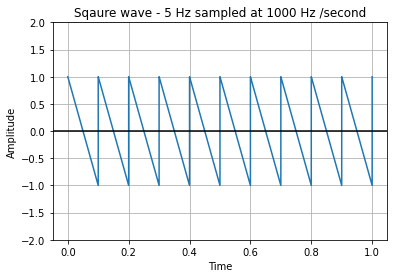

In [18]:
SAWTOOTH = signal.sawtooth(-2 * np.pi * 10 * timePoints  - 0.0004)
plt.plot(timePoints, SAWTOOTH )
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

### triangle

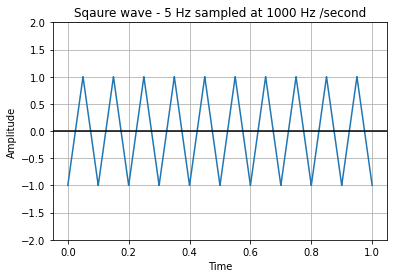

In [11]:
TRIANGLE = signal.sawtooth(2 * np.pi * 10 * timePoints, 0.5)
plt.plot(timePoints, TRIANGLE)
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

### sine

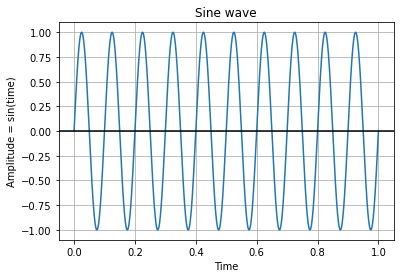

In [19]:
SINE   = np.sin(2 * np.pi *10* timePoints)
plt.plot(timePoints, SINE)
plt.title('Sine wave') 
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)') 
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
# Display the sine wave

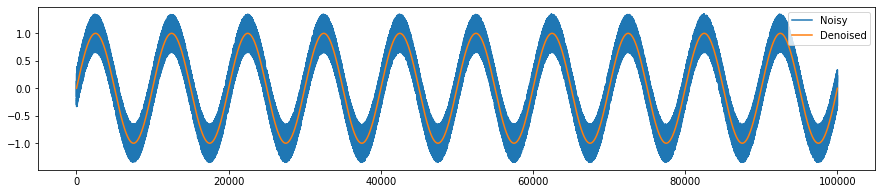

In [20]:
plt.figure(figsize = figSize)
plt.plot( make_noisy(SINE), label='Noisy')
plt.plot(SINE, label ='Denoised')
plt.legend()

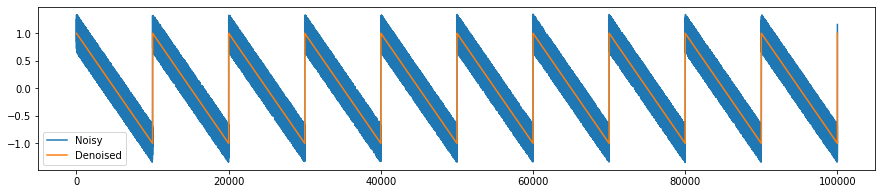

In [21]:
plt.figure(figsize =figSize)
plt.plot( make_noisy(SAWTOOTH), label='Noisy')
plt.plot(SAWTOOTH, label ='Denoised')
plt.legend()

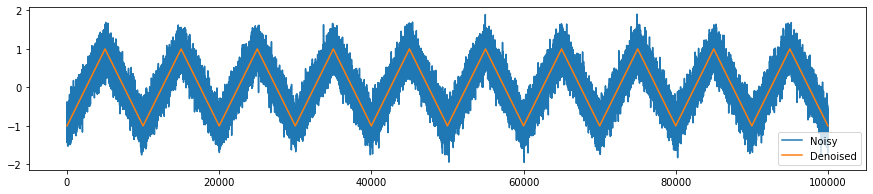

In [22]:
plt.figure(figsize = figSize)
plt.plot( make_noisy(TRIANGLE), label='Noisy')
plt.plot(TRIANGLE, label ='Denoised')
plt.legend()

### Sine wave noise removal using RNN and LSTM 

In [ ]:
denoised = SINE
noisy= make_noisy(SINE)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [ ]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [ ]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history1 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)

Epoch 1/6
700/700 [==============================] - 10s 14ms/step - loss: 0.0538 - val_loss: 0.0210
Epoch 2/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0141 - val_loss: 0.0086
Epoch 3/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 4/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0121 - val_loss: 0.0085
Epoch 5/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 6/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0100 - val_loss: 0.0062


Text(0.5, 1.0, 'simple RNN, SINE, Loss History')

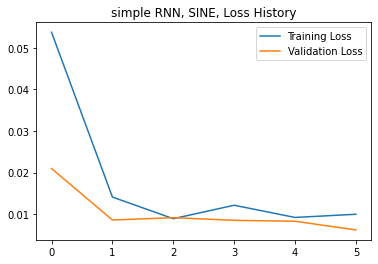

In [ ]:
fig = plt.figure()
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SINE, Loss History')

In [ ]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

In [ ]:
SNR_BEFORE_SINE_RNN

9.581515671992268

In [ ]:
SNR_AFTER_SINE_RNN

18.49842130692618

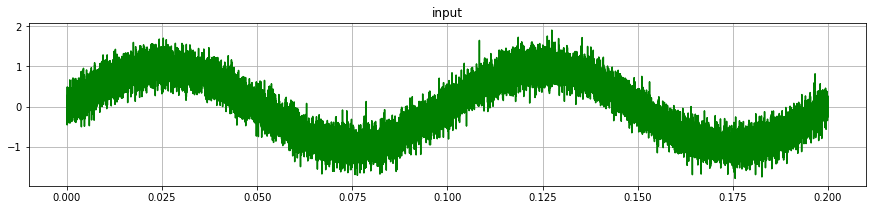

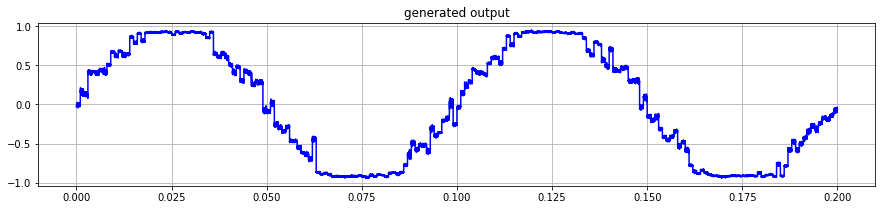

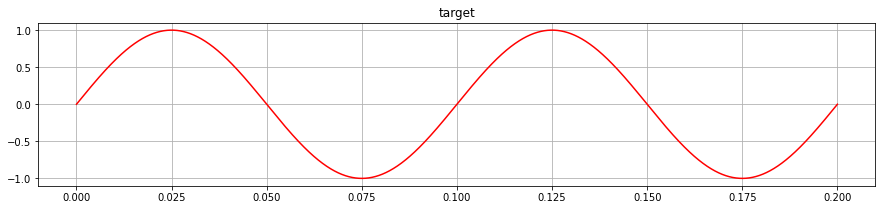

In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')
plt.grid()


In [ ]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history2 = model_LSTM.fit(x_train, y_train, epochs=30, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/30
700/700 [==============================] - 20s 25ms/step - loss: 0.0443 - val_loss: 0.0024
Epoch 2/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 3/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/30
700/700 [==============================] - 18s 25ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/30
700/700 [==============================] - 19s 27ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/30
700/700 [==============================] - 17s 25ms/step - loss: 0.001

In [ ]:
fig = plt.figure()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [ ]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

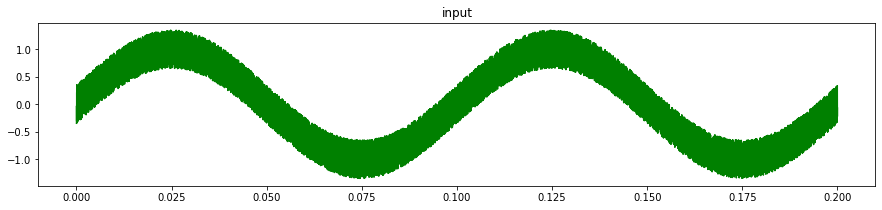

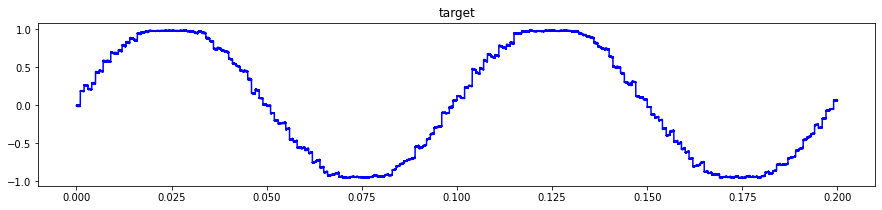

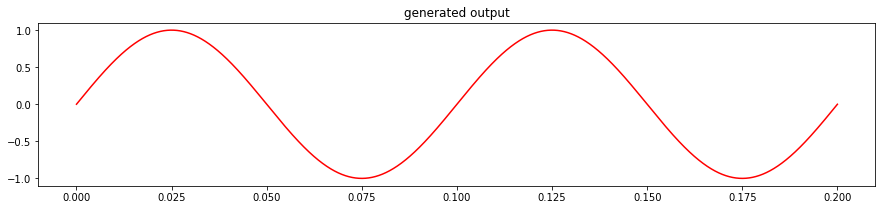

In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')

### SAWTOOTH wave noise removal using SIMPLE RNN and LSTM

In [ ]:
denoised = SAWTOOTH
noisy= make_noisy(SAWTOOTH)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [ ]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [ ]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history3 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 10s 13ms/step - loss: 0.0522
Epoch 2/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0145
Epoch 3/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0105
Epoch 4/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0083
Epoch 5/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0061
Epoch 6/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0056
Epoch 7/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0066
Epoch 8/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0052
Epoch 9/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0049
Epoch 10/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0050


In [ ]:
fig = plt.figure()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SAWTOOTH Loss History')

In [ ]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

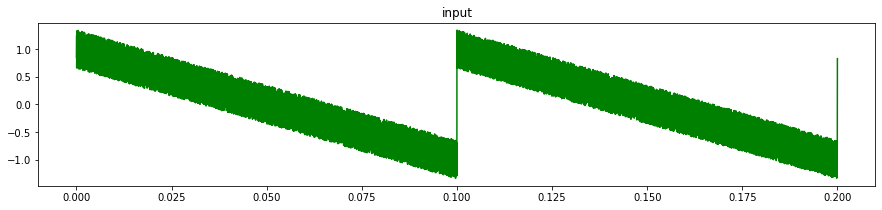

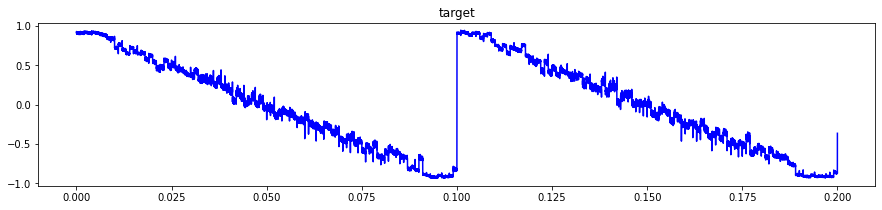

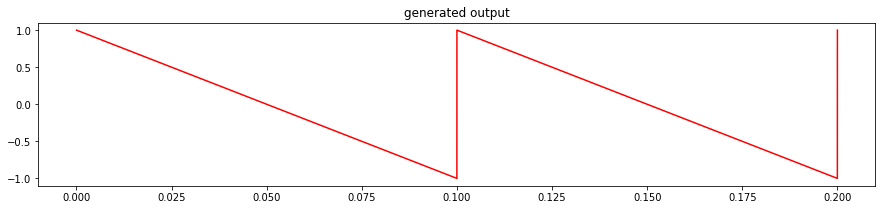

In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


In [ ]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history4 = model_LSTM.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 18s 23ms/step - loss: 0.0321
Epoch 2/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0043
Epoch 3/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0037
Epoch 4/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0036
Epoch 5/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0035
Epoch 6/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0034
Epoch 7/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0032
Epoch 8/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0028
Epoch 9/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0028
Epoch 10/10
700/700 [==============================] - 17s 25ms/step - loss: 0.0032


In [ ]:
fig = plt.figure()
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [ ]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

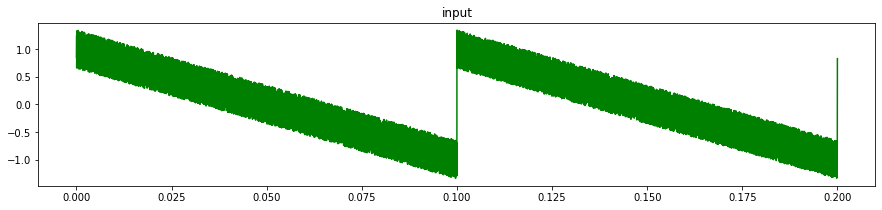

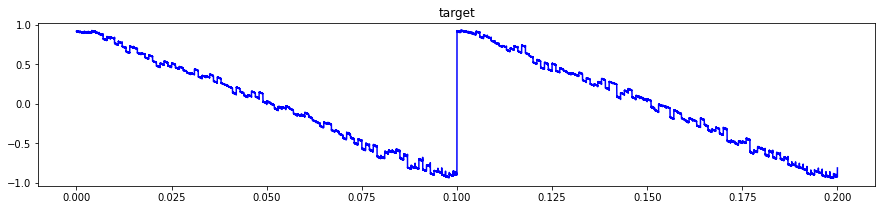

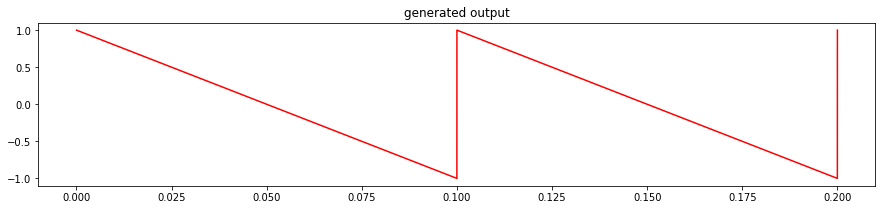

In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


###TRIANGLE wave noise removal using simple RNN and LSTM

In [ ]:
denoised = TRIANGLE
noisy= make_noisy(TRIANGLE)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [ ]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [ ]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history5 = SimpleRNNmodel.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0395
Epoch 2/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0125
Epoch 3/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0116
Epoch 4/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0121
Epoch 5/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0100
Epoch 6/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0087
Epoch 7/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0082
Epoch 8/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0081
Epoch 9/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0071
Epoch 10/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0064


In [ ]:
fig = plt.figure()
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SAWTOOTH Loss History')

In [ ]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

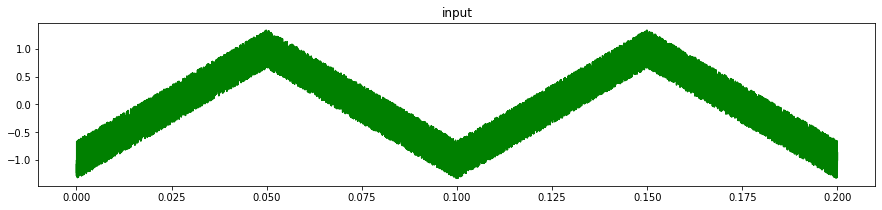

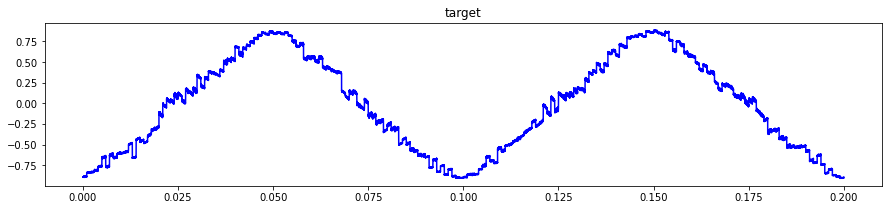

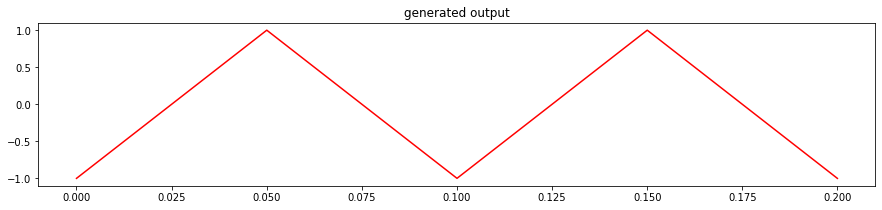

In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


In [ ]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history6 = model_LSTM.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 17s 22ms/step - loss: 0.0303
Epoch 2/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0048
Epoch 3/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0047
Epoch 4/10
700/700 [==============================] - 15s 21ms/step - loss: 0.0039
Epoch 5/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0039
Epoch 6/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0039
Epoch 7/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0035
Epoch 8/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0036
Epoch 9/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0033
Epoch 10/10
700/700 [==============================] - 15s 21ms/step - loss: 0.0036


In [ ]:
fig = plt.figure()
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [ ]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

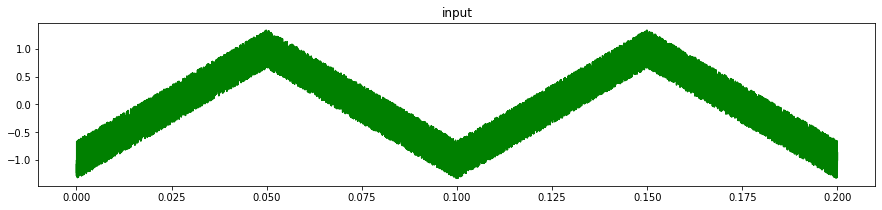

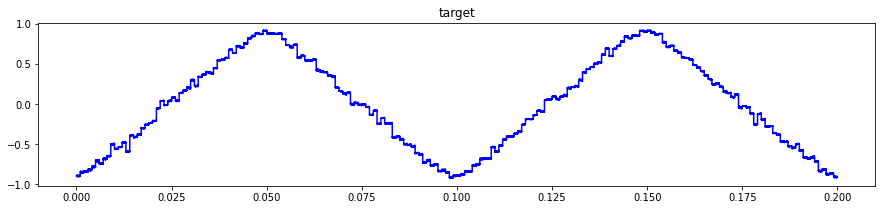

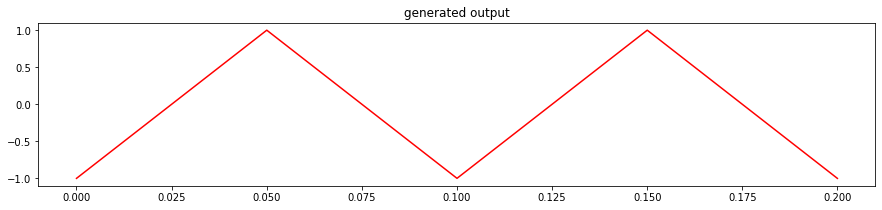

In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')

### unstationary noise

In [ ]:
np.pi


3.141592653589793

###2D

In [ ]:
def create_noise(sig):
  return sig +  np.random.normal(0,0.05,sig.shape)

In [ ]:
figureSize = (12, 5)
t = np.linspace(0, 20*np.pi, 1000 )
samplingConst = 100

a circle with R=1

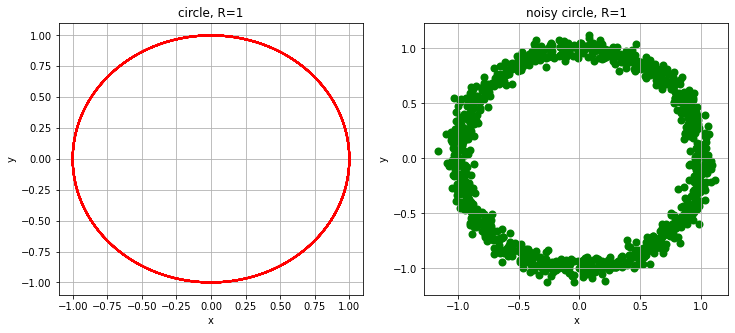

In [ ]:
x_circle = np.cos(t)
y_circle = np.sin(t)
# x_circle_noisy , y_circle_noisy = make_noisy(x_circle) , make_noisy(y_circle)
x_circle_noisy , y_circle_noisy = create_noise(x_circle) , create_noise(y_circle)

# plt.figure()
plt.figure(figsize = figureSize)

plt.subplot(1,2,1)
plt.plot(x_circle,y_circle,linewidth=2,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('circle, R=1')
plt.grid()



# plt.figure(figsize = figureSize)
plt.subplot(1,2,2)
plt.scatter(x_circle_noisy,y_circle_noisy,linewidth=2,color='g'  )
plt.xlabel('x')
plt.ylabel('y')
plt.title('noisy circle, R=1')
plt.grid()

In [ ]:
noisy = np.zeros( (100, 1000  , 2))
denoised = np.zeros ( (100 , 1000  , 2))

for i in range(100):
  noisy[i,: ,0] , noisy[i , : , 1] = create_noise(x_circle) , create_noise(y_circle)
  denoised[i,: ,0] , denoised[i , : , 1] = x_circle ,y_circle


In [ ]:
samplingConst =1
y_train , y_validation , y_test = denoised[ :,  :700*samplingConst  ], denoised[ : ,  700*samplingConst:800*samplingConst ], denoised[:,  800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :,:700*samplingConst ]   , noisy[:, 700*samplingConst:800*samplingConst  ]  , noisy[ :, 800*samplingConst: ]

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

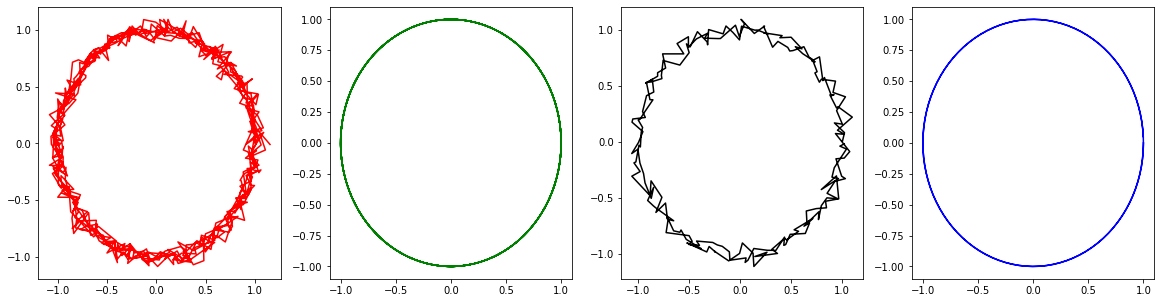

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.plot(x_train[1, : , 0], x_train[1,: , 1], color= 'r')
plt.subplot(1,4,2)
plt.plot(y_train[1, : , 0] , y_train[1, : , 1],color ='g')
plt.subplot(1,4,3)
plt.plot(x_test[1, : , 0], x_test[1, : , 1] , color= 'k')
plt.subplot(1,4,4)
plt.plot(y_test[1, : , 0], y_test[1, : , 1] , color= 'b')

In [ ]:
x_train = x_train.reshape((700,100,2))
x_validation = x_validation.reshape((100,100,2))
x_test = x_test.reshape((200,100,2))

y_train = y_train.reshape((700,100,2))
y_validation = y_validation.reshape((100,100,2))
y_test = y_test.reshape((200,100,2))

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output= tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
# model_output = tf.keras.layers.Dense(2 , activation = 'tanh') (m)
RNNmodel = tf.keras.models.Model(inputs=model_input, outputs=model_output)
RNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
# my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mse', optimizer= my_adam_optimizer )
history=RNNmodel.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation), batch_size=1, verbose=1)

Epoch 1/10
700/700 [==============================] - 9s 11ms/step - loss: 0.1184 - val_loss: 0.0359
Epoch 2/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0223 - val_loss: 0.0161
Epoch 3/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 4/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 5/10
700/700 [==============================] - 10s 15ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 6/10
700/700 [==============================] - 7s 11ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 7/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 8/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 9/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 10/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0059 - val_l

In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = RNNmodel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', loss)
# Prediction
y_hat = RNNmodel.predict(x_test)

Evaluation with Test Set:
7/7 [==============================] - 0s 11ms/step - loss: 0.0056
Test loss: 0.00560616422444582


In [ ]:
y_resh = y_test.reshape((200,100,2))
x_resh = x_test.reshape((100,200,2))
resh = y_hat.reshape((100,200 , 2))

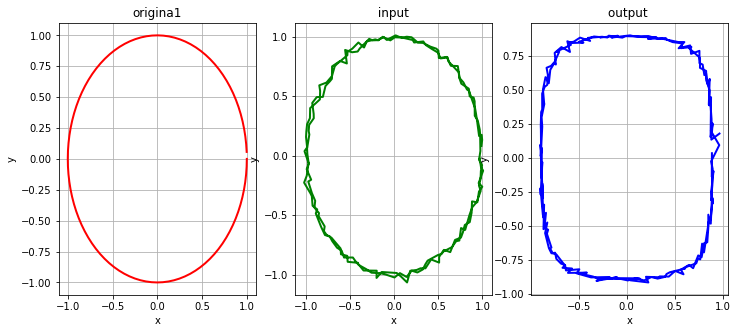

In [ ]:
plt.figure(figsize = figureSize)
plt.subplot(1,3,1)

# plt.scatter(y_test.reshape((20000,2))[:,0],y_test.reshape((20000,2))[:,1],linewidth=2,color='r')
plt.plot(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('origina1')
plt.grid()

plt.subplot(1,3,2)
# plt.scatter(x_test.reshape((20000,2))[:,0],y_hat.reshape((20000,2))[:,1],linewidth=2,color='g')
plt.plot(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title(' input ')
plt.grid()


plt.subplot(1,3,3)
plt.plot(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('output ')
plt.grid()

epitrochoid

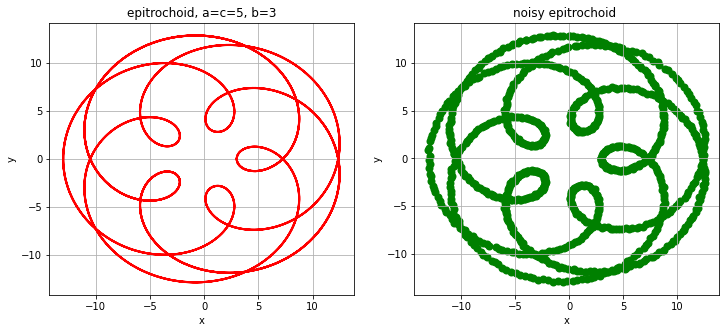

In [ ]:
a=5;b=3;c=5
x_epitrochoid = (a+b)*np.cos(t)-c*np.cos((a/b +1)* t)
y_epitrochoid = (a+b)*np.sin(t)-c*np.sin((a/b +1)* t)
x_epitrochoid_noisy , y_epitrochoid_noisy = create_noise(x_epitrochoid) , create_noise(y_epitrochoid)
plt.figure(figsize = figureSize)

plt.subplot(1,2,1)

plt.plot(x_epitrochoid,y_epitrochoid,linewidth=2,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('epitrochoid, a=c=5, b=3')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x_epitrochoid_noisy,y_epitrochoid_noisy,linewidth=2,color='g'  )
plt.xlabel('x')
plt.ylabel('y')
plt.title('noisy epitrochoid ')
plt.grid()

In [ ]:
noisy = np.zeros( (100, 1000  , 2))
denoised = np.zeros ( (100 , 1000  , 2))

for i in range(100):
  noisy[i,: ,0] , noisy[i , : , 1] = create_noise(x_epitrochoid) , create_noise(y_epitrochoid)
  denoised[i,: ,0] , denoised[i , : , 1] = x_epitrochoid ,y_epitrochoid


In [ ]:
maximum = noisy.max()
noisy = noisy / maximum
denoised = denoised / maximum

In [ ]:
samplingConst =1
y_train , y_validation , y_test = denoised[ :,  :700*samplingConst  ], denoised[ : ,  700*samplingConst:800*samplingConst ], denoised[:,  800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :,:700*samplingConst ]   , noisy[:, 700*samplingConst:800*samplingConst  ]  , noisy[ :, 800*samplingConst: ]

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

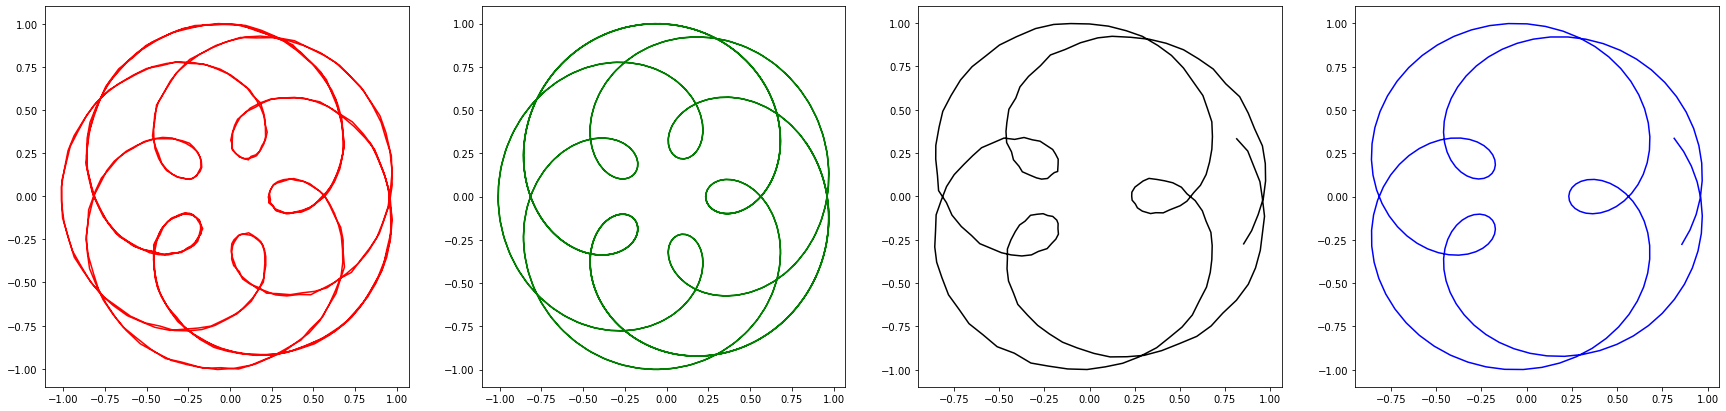

In [ ]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
plt.plot(x_train[1, : , 0], x_train[1,: , 1], color= 'r')
plt.subplot(1,4,2)
plt.plot(y_train[1, : , 0] , y_train[1, : , 1],color ='g')
plt.subplot(1,4,3)
plt.plot(x_test[1, : , 0], x_test[1, : , 1] , color= 'k')
plt.subplot(1,4,4)
plt.plot(y_test[1, : , 0], y_test[1, : , 1] , color= 'b')

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

In [ ]:
x_train = x_train.reshape((700,100,2))
x_validation = x_validation.reshape((100,100,2))
x_test = x_test.reshape((200,100,2))

y_train = y_train.reshape((700,100,2))
y_validation = y_validation.reshape((100,100,2))
y_test = y_test.reshape((200,100,2))

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output= tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
# model_output = tf.keras.layers.Dense(2 , activation = 'tanh') (m)
RNNmodel = tf.keras.models.Model(inputs=model_input, outputs=model_output)
RNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
# my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mse', optimizer= my_adam_optimizer )
history=RNNmodel.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=4, verbose=1)

Epoch 1/30
175/175 [==============================] - 5s 21ms/step - loss: 0.2052 - val_loss: 0.1371
Epoch 2/30
175/175 [==============================] - 3s 20ms/step - loss: 0.1422 - val_loss: 0.0952
Epoch 3/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0892 - val_loss: 0.0550
Epoch 4/30
175/175 [==============================] - 3s 20ms/step - loss: 0.0469 - val_loss: 0.0333
Epoch 5/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0284 - val_loss: 0.0247
Epoch 6/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0201 - val_loss: 0.0205
Epoch 7/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0162 - val_loss: 0.0184
Epoch 8/30
175/175 [==============================] - 3s 20ms/step - loss: 0.0143 - val_loss: 0.0173
Epoch 9/30
175/175 [==============================] - 4s 21ms/step - loss: 0.0132 - val_loss: 0.0159
Epoch 10/30
175/175 [==============================] - 3s 19ms/step - loss: 0.0124 - val_lo

In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = RNNmodel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', loss)
# Prediction
y_hat = RNNmodel.predict(x_test)

Evaluation with Test Set:
7/7 [==============================] - 0s 13ms/step - loss: 0.0042
Test loss: 0.004187473561614752


In [ ]:
y_resh = y_test.reshape((200,100,2))
x_resh = x_test.reshape((100,200,2))
resh = y_hat.reshape((100,200 , 2))

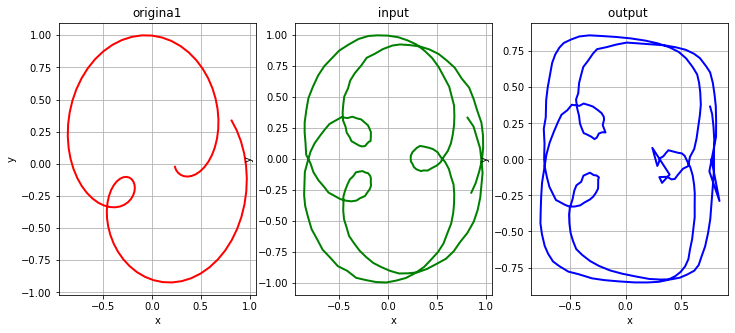

In [ ]:
plt.figure(figsize = figureSize)
plt.subplot(1,3,1)

# plt.scatter(y_test.reshape((20000,2))[:,0],y_test.reshape((20000,2))[:,1],linewidth=2,color='r')
plt.plot(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('origina1')
plt.grid()

plt.subplot(1,3,2)
# plt.scatter(x_test.reshape((20000,2))[:,0],y_hat.reshape((20000,2))[:,1],linewidth=2,color='g')
plt.plot(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title(' input ')
plt.grid()


plt.subplot(1,3,3)
plt.plot(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('output ')
plt.grid()

nephroid

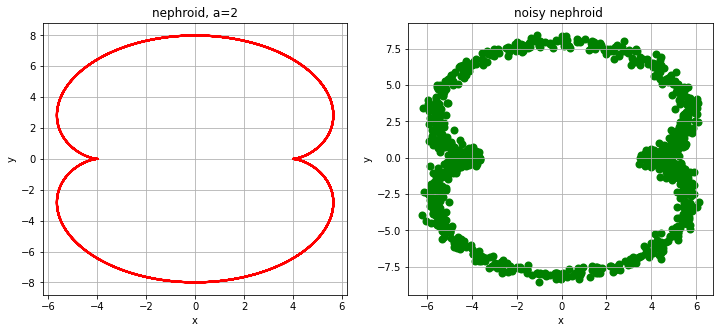

In [ ]:
a=2
x_nephroid = a*(np.cos(3*t)-3*np.cos(t))
y_nephroid = a*(np.sin(3*t)-3*np.sin(t))
x_nephroid_noisy , y_nephroid_noisy = make_noisy(x_nephroid) , make_noisy(y_nephroid)
plt.figure(figsize = figureSize)
plt.subplot(1,2,1)

plt.plot(x_nephroid,y_nephroid,linewidth=2,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('nephroid, a=2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x_nephroid_noisy,y_nephroid_noisy,linewidth=2,color='g'  )
plt.xlabel('x')
plt.ylabel('y')
plt.title('noisy nephroid ')
plt.grid()

In [ ]:
noisy = np.zeros( (100, 1000  , 2))
denoised = np.zeros ( (100 , 1000  , 2))

for i in range(100):
  noisy[i,: ,0] , noisy[i , : , 1] = create_noise(x_nephroid) , create_noise(y_nephroid)
  denoised[i,: ,0] , denoised[i , : , 1] = x_nephroid ,y_nephroid


In [ ]:
maximum = denoised.max()
denoised = denoised / maximum
noisy = noisy / maximum

In [ ]:
samplingConst =1
y_train , y_validation , y_test = denoised[ :,  :700*samplingConst  ], denoised[ : ,  700*samplingConst:800*samplingConst ], denoised[:,  800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :,:700*samplingConst ]   , noisy[:, 700*samplingConst:800*samplingConst  ]  , noisy[ :, 800*samplingConst: ]

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

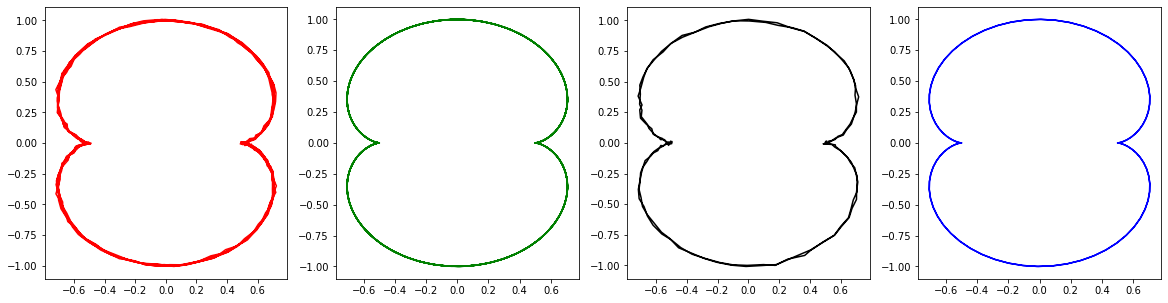

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.plot(x_train[1, : , 0], x_train[1,: , 1], color= 'r')
plt.subplot(1,4,2)
plt.plot(y_train[1, : , 0] , y_train[1, : , 1],color ='g')
plt.subplot(1,4,3)
plt.plot(x_test[1, : , 0], x_test[1, : , 1] , color= 'k')
plt.subplot(1,4,4)
plt.plot(y_test[1, : , 0], y_test[1, : , 1] , color= 'b')

In [ ]:
x_train = x_train.reshape((700,100,2))
x_validation = x_validation.reshape((100,100,2))
x_test = x_test.reshape((200,100,2))

y_train = y_train.reshape((700,100,2))
y_validation = y_validation.reshape((100,100,2))
y_test = y_test.reshape((200,100,2))

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [ ]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output= tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
# model_output = tf.keras.layers.Dense(2 , activation = 'tanh') (m)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
# my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mse', optimizer= my_adam_optimizer )
history=model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=4, verbose=1)

Epoch 1/60
175/175 [==============================] - 5s 21ms/step - loss: 0.5951 - val_loss: 0.5018
Epoch 2/60
175/175 [==============================] - 4s 22ms/step - loss: 0.4260 - val_loss: 0.3614
Epoch 3/60
175/175 [==============================] - 5s 30ms/step - loss: 0.3174 - val_loss: 0.2792
Epoch 4/60
175/175 [==============================] - 3s 17ms/step - loss: 0.2506 - val_loss: 0.2242
Epoch 5/60
175/175 [==============================] - 3s 17ms/step - loss: 0.2025 - val_loss: 0.1816
Epoch 6/60
175/175 [==============================] - 3s 17ms/step - loss: 0.1635 - val_loss: 0.1457
Epoch 7/60
175/175 [==============================] - 3s 17ms/step - loss: 0.1299 - val_loss: 0.1143
Epoch 8/60
175/175 [==============================] - 3s 17ms/step - loss: 0.1006 - val_loss: 0.0875
Epoch 9/60
175/175 [==============================] - 3s 17ms/step - loss: 0.0769 - val_loss: 0.0671
Epoch 10/60
175/175 [==============================] - 3s 17ms/step - loss: 0.0595 - val_lo

In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', loss)
# Prediction
y_hat = model.predict(x_test)

Evaluation with Test Set:
7/7 [==============================] - 0s 11ms/step - loss: 0.0016
Test loss: 0.0015735182678326964


In [ ]:
x_test.shape

(200, 100, 2)

In [ ]:
y_hat.shape

(200, 100, 2)

In [ ]:
y_resh = y_test.reshape((200,100,2))
x_resh = x_test.reshape((100,200,2))
resh = y_hat.reshape((100,200 , 2))

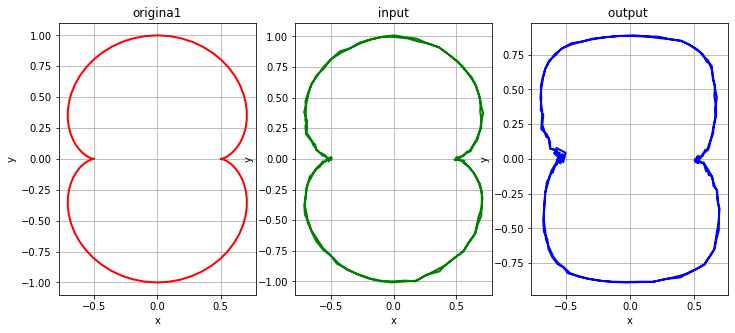

In [ ]:
plt.figure(figsize = figureSize)
plt.subplot(1,3,1)

plt.plot(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')
# plt.scatter(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('origina1')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')
# plt.scatter(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title(' input ')
plt.grid()


plt.subplot(1,3,3)
plt.plot(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')
# plt.scatter(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')

plt.xlabel('x')
plt.ylabel('y')
plt.title('output ')
plt.grid()

## AUDIO

In [12]:
signal_file = '/content/drive/MyDrive/audio/data_signal.wav'
signal_, sr = librosa.load(signal_file)
signal=np.interp(signal_, (signal_.min(), signal_.max()), (-1, 1))

In [13]:
dur  = np.ceil(len(signal)/sr)       

In [14]:
dur

3.0

In [15]:
len(signal)

58176

In [16]:
sr

22050

In [17]:
length = len(signal) / sr

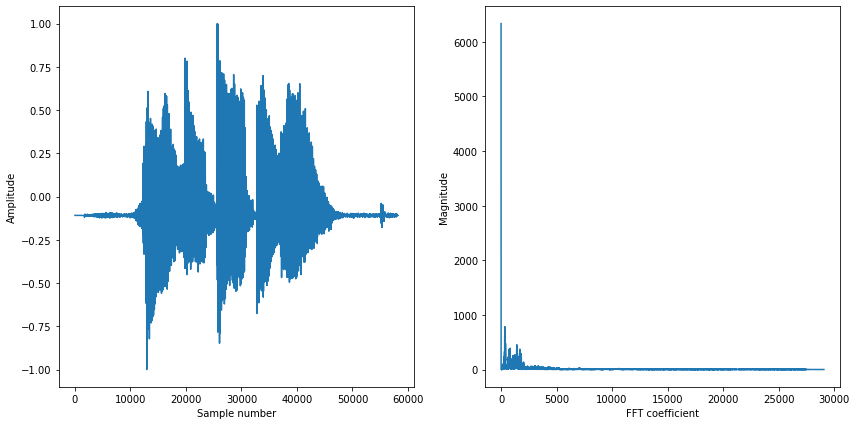

In [18]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(signal )
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.subplot(1,2,2)
X=np.fft.rfft(signal)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()

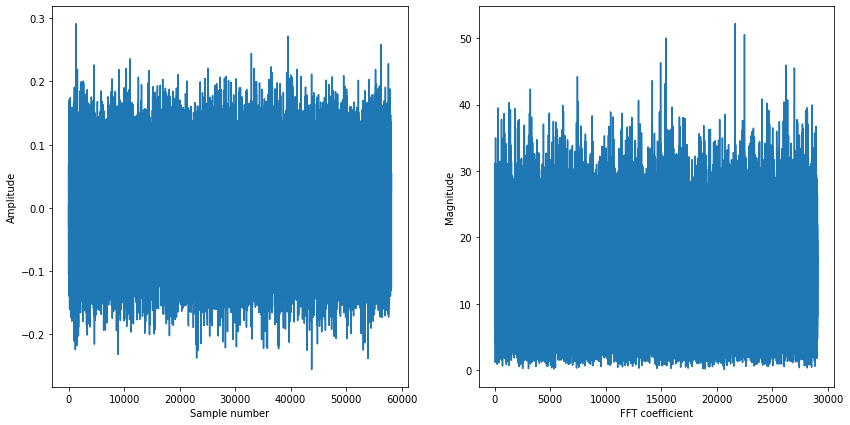

In [19]:
noise=get_white_noise(signal,SNR=10)
signal_noise=signal+noise

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.subplot(1,2,2)
X=np.fft.rfft(noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()

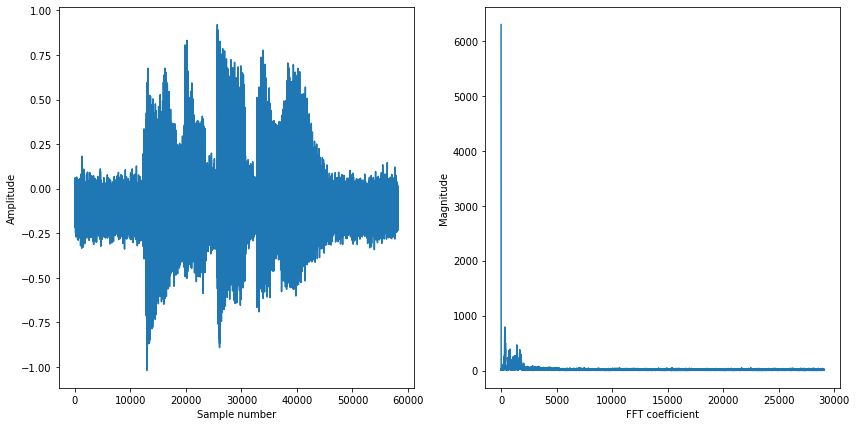

In [20]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.subplot(1,2,2)
X=np.fft.rfft(signal_noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()

In [21]:
calc_SNR(signal, signal_noise)

10.36046873925171

In [81]:
noisy = np.zeros((500 , len(signal)))
denoised = np.zeros((500 , len(signal)))

for i in range(500):
  noise=get_white_noise(signal,SNR=10)
  signal_noise=signal+noise
  noisy[i ,:] = signal_noise
  denoised[i ,:] = signal

  

((500, 58176), (500, 58176))

In [105]:

y_train , y_validation , y_test = denoised[:, : 40700  ]   , denoised[ :, 40700: 46700 ]  , denoised[:,  46700: -76] 
x_train , x_validation , x_test = noisy[:,  : 40700 ]   , noisy[:,  40700:46700  ]  , noisy[:,  46700:-76 ]

In [106]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((500, 40700),
 (500, 6000),
 (500, 11400),
 (500, 40700),
 (500, 6000),
 (500, 11400))

In [107]:
samplingConst = 100

In [108]:
x_train = x_train.reshape((500*407,samplingConst,1))
x_validation = x_validation.reshape((500*60,samplingConst,1))
x_test = x_test.reshape((500*114,samplingConst,1))

y_train = y_train.reshape((500*407,samplingConst,1))
y_validation = y_validation.reshape((500*60,samplingConst,1))
y_test = y_test.reshape((500*114,samplingConst,1))

In [109]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((203500, 100, 1),
 (30000, 100, 1),
 (57000, 100, 1),
 (203500, 100, 1),
 (30000, 100, 1),
 (57000, 100, 1))

In [98]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.Bidirectional (tf.keras.layers.SimpleRNN(50, input_shape = (samplingConst,1) ,  activation='tanh' )))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history1 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 128, validation_data= (x_validation , y_validation),  verbose=1)

Epoch 1/6
1590/1590 [==============================] - 104s 64ms/step - loss: 0.0038 - val_loss: 8.8084e-04
Epoch 2/6
1590/1590 [==============================] - 89s 56ms/step - loss: 0.0014 - val_loss: 8.6545e-04
Epoch 3/6
1590/1590 [==============================] - 104s 65ms/step - loss: 0.0012 - val_loss: 7.8371e-04
Epoch 4/6
1590/1590 [==============================] - 88s 55ms/step - loss: 0.0012 - val_loss: 8.4496e-04
Epoch 5/6
1590/1590 [==============================] - 92s 58ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/6
1590/1590 [==============================] - 88s 55ms/step - loss: 0.0011 - val_loss: 8.3592e-04


Text(0.5, 1.0, 'RNN, Loss History')

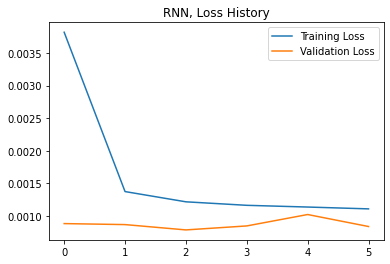

In [99]:
fig = plt.figure()
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('RNN, Loss History')

In [100]:
x_test.flatten().shape

(5700000,)

In [103]:
x_test.shape

(57000, 100, 1)

In [115]:
y_hat = SimpleRNNmodel.predict(x_test)

In [116]:
test_input = x_test.reshape((500 , 11400 , 1))
y_hat_reshaped = y_hat.reshape((500 , 11400 , 1))
target_reshaped = y_test.reshape((500 , 11400 , 1))

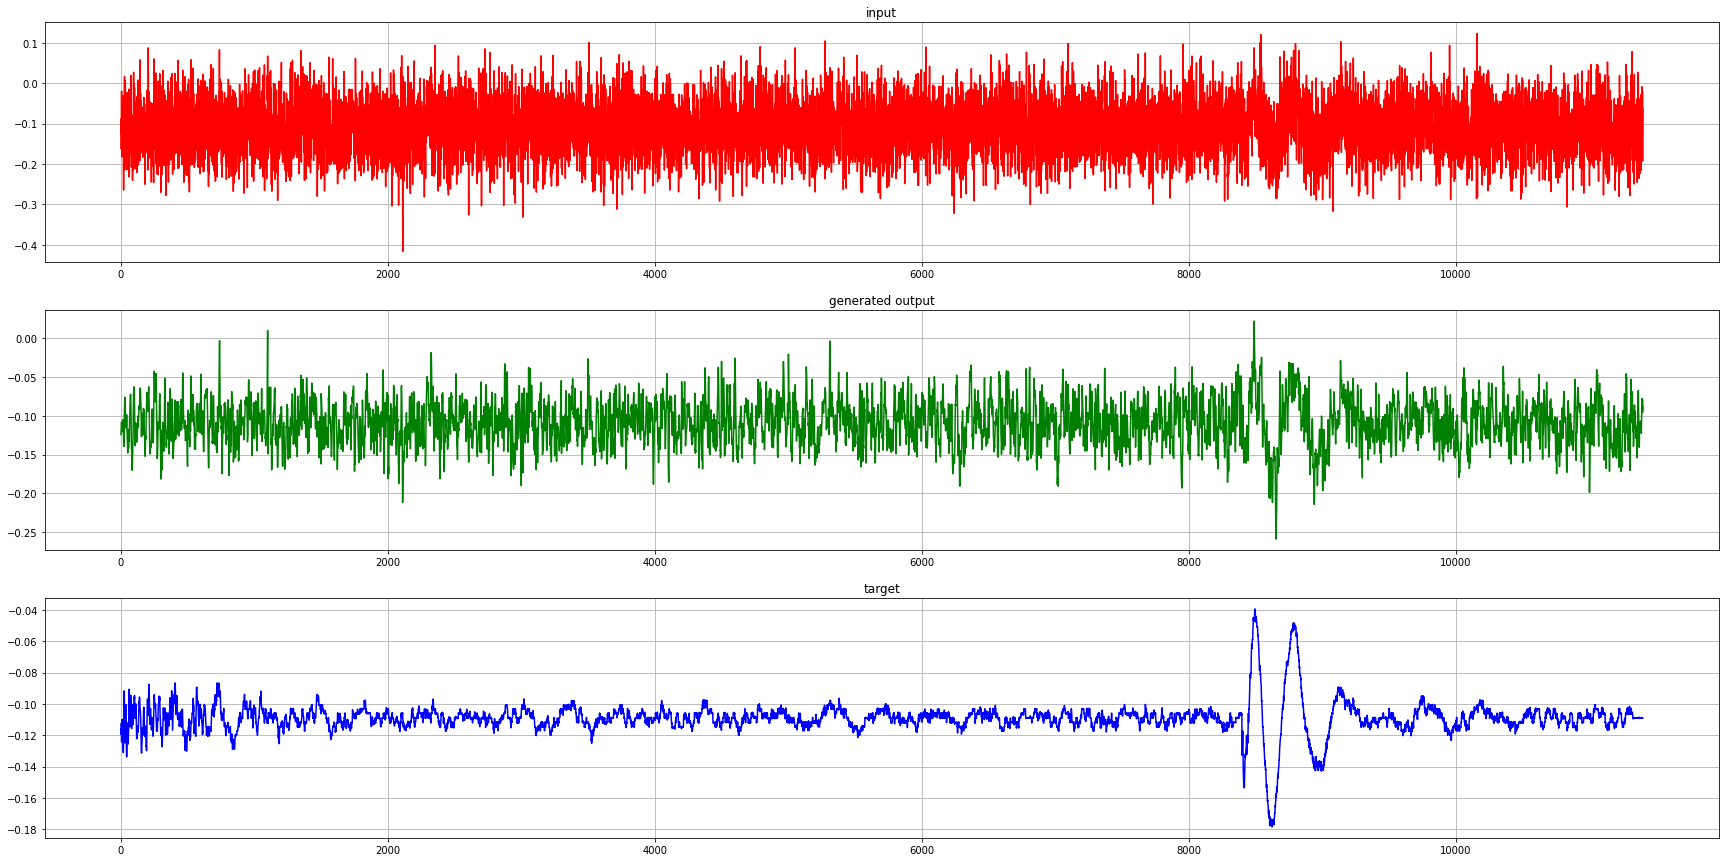

In [117]:
plt.figure(figsize = (30 , 15))
plt.subplot(3,1,1)
plt.plot (np.arange(11400).T , test_input[-1] , 'r')

plt.title('input')
plt.grid()

plt.subplot(3,1,2)
plt.plot (np.arange(11400).T ,y_hat_reshaped[-1] , 'g' )

plt.title('generated output')
plt.grid()

plt.subplot(3,1,3)
plt.plot (np.arange(11400).T , target_reshaped[-1] , 'b' )

plt.title('target')
plt.grid()


In [128]:
sf.write('noisy_signal.wav', test_input[-1] , 22050)


In [129]:
sf.write('generated.wav' , y_hat_reshaped[-1] , 22050)

In [130]:
sf.write('target.wav' , target_reshaped[-1] , 22050)

In [131]:
calc_SNR( target_reshaped[-1] , test_input[-1])

6.0528627199652725

In [132]:
calc_SNR( target_reshaped[-1] , y_hat_reshaped[-1])

12.639062755834319

In [135]:
noisy[1].shape , denoised[1].shape

((58176,), (58176,))

In [143]:
preparedInput = np.zeros((581 , 100 , 1))
for i in range(581):
    st = i*samplingConst
    ed = (i+1)*samplingConst
    preparedInput[ i ,:] = noisy[1] [st : ed].reshape((100,1))

In [144]:
calculated_output = SimpleRNNmodel.predict(preparedInput)

In [145]:
calculated_output.shape

(581, 100)

In [146]:
resh = calculated_output.reshape((58100,))

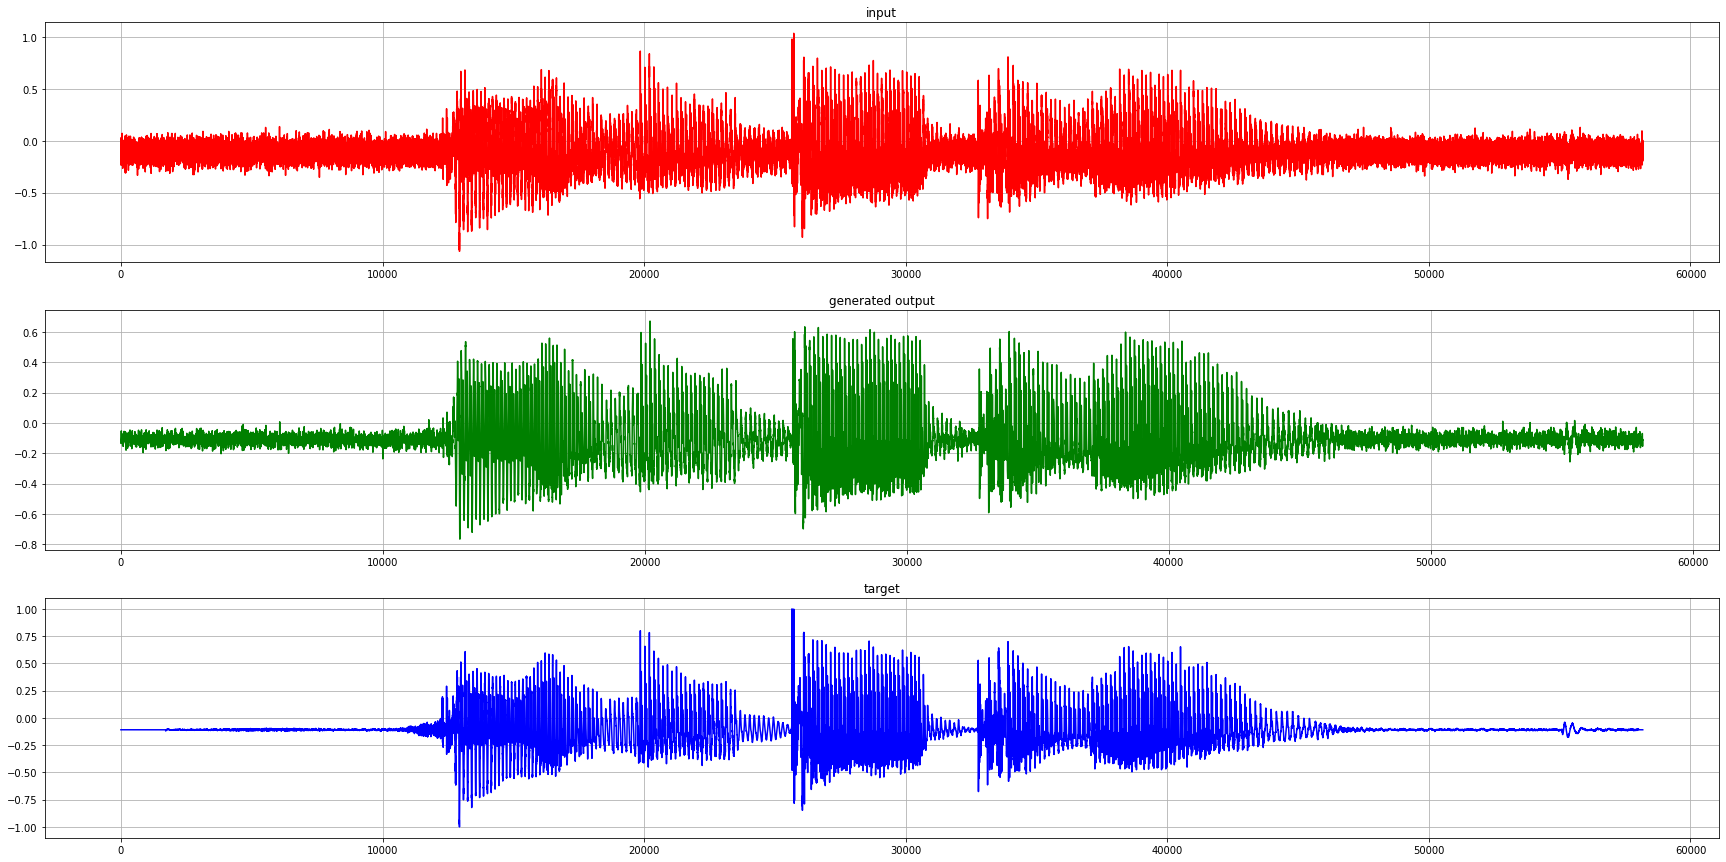

In [147]:
plt.figure(figsize = (30 , 15))
plt.subplot(3,1,1)
plt.plot (np.arange(58176).T , noisy[1] , 'r')

plt.title('input')
plt.grid()

plt.subplot(3,1,2)
plt.plot (np.arange(58100).T ,resh , 'g' )

plt.title('generated output')
plt.grid()

plt.subplot(3,1,3)
plt.plot (np.arange(58176).T , denoised[1] , 'b' )

plt.title('target')
plt.grid()


In [148]:
sf.write('noisy_signal_1.wav',  noisy[1] , 22050)


In [149]:
sf.write('generated_1.wav' , resh , 22050)

In [150]:
sf.write('target_1.wav' , denoised[1]  , 22050)

In [151]:
calc_SNR(denoised[1] , noisy[1])

10.396343688004318

In [155]:
calc_SNR( denoised[1][:-76] , resh)

16.0836771893569

In [70]:
# signal = np.array(signal).T
# signal_noise= np.array(signal_noise).T
# #تصمیم گرفتم داده ها رو با تعدادی کم تر از نرخ سمپلینگ تقسیم کنم که تو هر تیکه یه جور نویز باقی بمونه

# input_data  = np.zeros((3, sr,1)) # (30, 22050,1)
# output_data = np.zeros((3, sr,1)) # (30, 22050,1)

In [24]:
# for i in range(500):
#   i_st = sr*i
#   i_ed = sr*(i+1)
#   input_data[i,: ,0] = signal_noise[i_st : i_ed]
#   output_data[i,: , 0] = signal[i_st : i_ed]

In [26]:

# train on 20 seconds
x_train = input_data [:8, :]
y_train = output_data[:8, :]


# 1 periods for validation data
# train on 1  seconds
x_validation = input_data [8:9, :]
y_validation = output_data[8:9, :]

# test data is the rest of data 
x_test = input_data [9:, :]
y_test = output_data[9:, :]


print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_validation.shape, y_validation.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

x_train, y_train (8, 2000, 1) (8, 2000, 1)
x_valid, y_valid (1, 2000, 1) (1, 2000, 1)
x_test, y_test (2, 2000, 1) (2, 2000, 1)


In [ ]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (58176,1) ,  activation='tanh' ,  return_sequences = True ))
# SimpleRNNmodel.add(tf.keras.layers.Dense(2000, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history1 = SimpleRNNmodel.fit(noisy_dataset, clean_dataset, epochs=6, batch_size= 1, validation_data= (noisy_dataset , clean_dataset),  verbose=1)

In [ ]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (2000,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(2000, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history2 = model_LSTM.fit(x_train, y_train, epochs=30, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


In [ ]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')
plt.grid()


Text(0.5, 1.0, 'LSTM, Loss History')

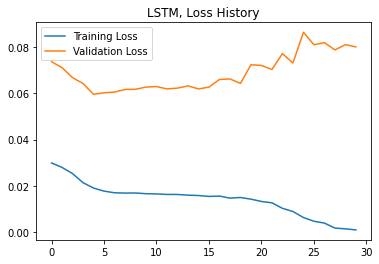

In [127]:
#15 epochs are enough
fig = plt.figure()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [ ]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

In [ ]:

#crop noise if its longer than signal
#for this code len(noise) shold be greater than len(signal)
#it will not work otherwise!
if(len(noise)>len(signal)):
    noise=noise[0:len(signal)]

noise=get_noise_from_sound(signal,noise,SNR=10)

signal_noise=signal+noise


print("SNR = " + str(20*np.log10(math.sqrt(np.mean(signal**2))/math.sqrt(np.mean(noise**2)))))

plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

from scipy.io.wavfile import write
write("/home/sleek_eagle/research/emotion/code/audio_processing/bbb.wav",sr,signal_noise)




#IMAGE

In [283]:
!wget https://github.com/Nadiam75/DeepLearning_HW_3/raw/main/city-sample.jpg

--2022-01-05 11:17:56--  https://github.com/Nadiam75/DeepLearning_HW_3/raw/main/city-sample.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_3/main/city-sample.jpg [following]
--2022-01-05 11:17:57--  https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_3/main/city-sample.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555593 (543K) [image/jpeg]
Saving to: ‘city-sample.jpg.2’

city-sample.jpg.2   100%[===================>] 542.57K  --.-KB/s    in 0.03s   

2022-01-05 11:17:57 (20.7 MB/s) - ‘city-sample.jpg.2’ saved [555593/555593]



In [284]:
import numpy as np
import os
import cv2



def noisy(noise_typ,image):


  if noise_typ == "gaussian" and  image.ndim == 3:
    row,col,ch= image.shape
    mean = 0
    var = 121
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

  if noise_typ == "gaussian" and  image.ndim == 2:
    row , col = image.shape
    mean = 0
    var = 64
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy

  elif noise_typ == "s&p" and image.ndim == 2:
    s_vs_p = 0.5
    amount = 0.08
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))  for i in image.shape]
    out[coords] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out


  elif noise_typ == "s&p" and image.ndim == 3:

    s_vs_p = 0.5
    amount = 0.04
    out = np.copy(image)
    # Salt mode
    # np.zeros(image.shape)
    num_salt = np.ceil(amount * image.size * s_vs_p)
    i  = image.shape[0]
    coords_i = np.random.randint(0, i - 1, int(num_salt)) 
    j  = image.shape[1]
    coords_j = np.random.randint(0, j - 1, int(num_salt)) 
    out[coords_i , coords_j , :] = 1


    num_pepper = np.ceil(amount * image.size * ( 1. -  s_vs_p) )
    i  = image.shape[0]
    coords_i = np.random.randint(0, i - 1, int(num_pepper)) 
    j  = image.shape[1]
    coords_j = np.random.randint(0, j - 1, int(num_pepper)) 
    out[coords_i , coords_j , :] = 0

    return out


  else:
    return "ERROR"

In [285]:
RGB_image = cv2.imread('city-sample.jpg')

In [286]:
GRAYSCALE_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)


Text(0.5, 1.0, 'original RGB')

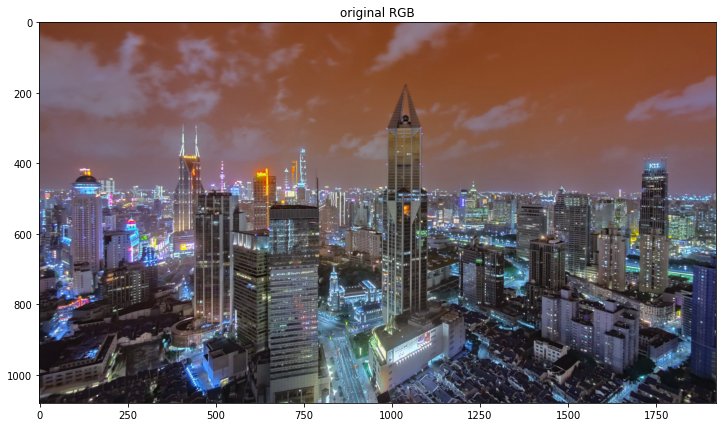

In [287]:
plt.figure(figsize =  (15 , 7))
plt.imshow(RGB_image)
plt.title('original RGB')

Text(0.5, 1.0, 'GAUSSIAN RGB')

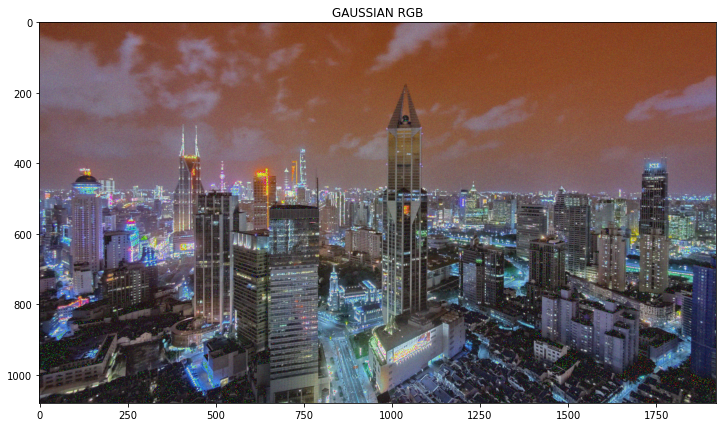

In [288]:
rgb_gaussian =noisy('gaussian',RGB_image)
plt.figure( figsize =(15 , 7) )
plt.imshow(np.uint8(rgb_gaussian), cmap="gray")
plt.title('GAUSSIAN RGB')


Text(0.5, 1.0, 'SALT AND PEPPER RGB')

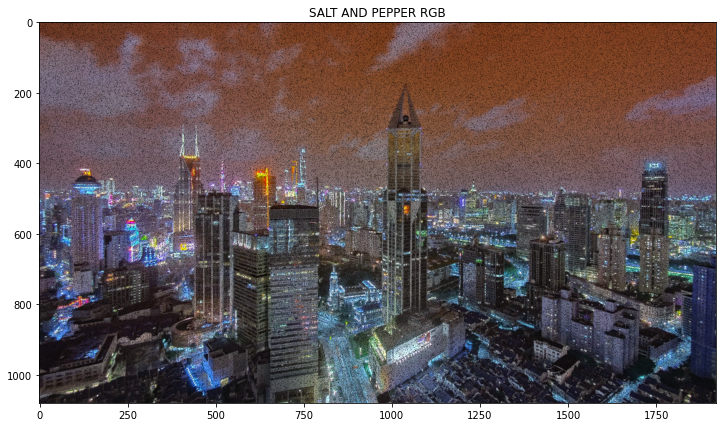

In [289]:
rgb_saltpepper =noisy('s&p',RGB_image)
plt.figure( figsize =(15 , 7) )
plt.imshow(np.uint8(rgb_saltpepper), cmap="gray")
plt.title('SALT AND PEPPER RGB')

Text(0.5, 1.0, 'original GRAYSCALE')

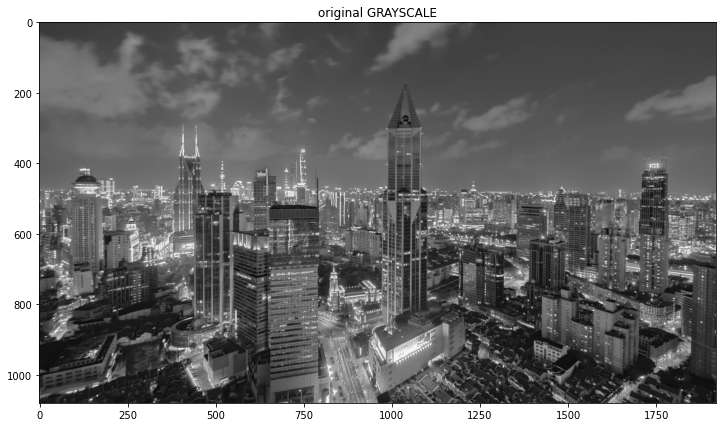

In [290]:
plt.figure( figsize =(15 , 7) )
plt.imshow(GRAYSCALE_image , cmap = 'gray')
plt.title('original GRAYSCALE')


Text(0.5, 1.0, 'GAUSSIAN GRAYSCALE')

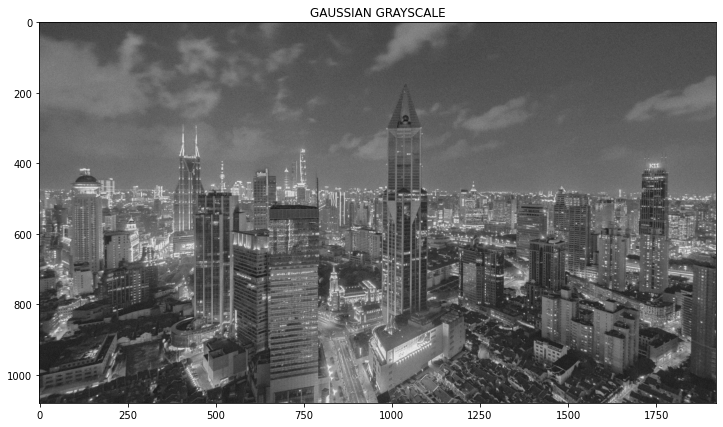

In [291]:
gray_gaussian =noisy('gaussian',GRAYSCALE_image)
plt.figure( figsize =(15 , 7) )
plt.imshow(gray_gaussian, cmap="gray")
plt.title('GAUSSIAN GRAYSCALE')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Text(0.5, 1.0, 'SALT AND PEPPER GRAYSCALE')

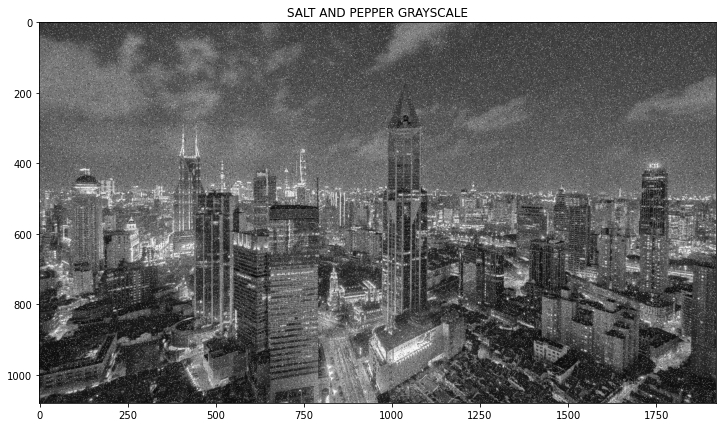

In [292]:
gray_saltpepper =noisy('s&p',GRAYSCALE_image)
plt.figure( figsize =(15 , 7) )
plt.imshow(gray_saltpepper, cmap="gray")
plt.title('SALT AND PEPPER GRAYSCALE')

## LSTM

### gaussian

In [293]:
img_gray = GRAYSCALE_image / 255.0
noisy_image  = gray_gaussian / 255.0

In [294]:
dur=img_gray.shape[0]
sample_rate=img_gray.shape[1]
true_signal = np.array([img_gray.flatten(),img_gray.flatten()]).T
noisy_signal= np.array([noisy_image.flatten(),noisy_image.flatten()]).T
print(true_signal.shape)
# splitting data into 1 second chunks for our  signal
input_data  = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
target_data = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
for i in range(dur):
    st = i*sample_rate
    et = (i+1)*sample_rate
    input_data[i,:]  = noisy_signal [st:et]
    target_data[i,:] = true_signal  [st:et]


# train data
x_train = input_data [:, :]
y_train = target_data[:, :]


# validation data
x_valid = input_data [540:810, :]
y_valid = target_data[540:810, :]

# test data  
x_test = input_data [540:810, :]
y_test = target_data[540:810, :]

########
# test_= np.zeros((y_test.shape[0],1,1))
# for i in range(0,y_test.shape[0]):
#     test_[i,:,:]  = y_test[i,0,0]
# test_=test_.flatten()
########

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_valid.shape, y_valid.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

(2073600, 2)
x_train, y_train (1080, 1920, 2) (1080, 1920, 2)
x_valid, y_valid (270, 1920, 2) (270, 1920, 2)
x_test, y_test (270, 1920, 2) (270, 1920, 2)


In [295]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.LSTM(2, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



Epoch 1/10
34/34 [==============================] - 22s 554ms/step - loss: 0.0191 - val_loss: 0.0116
Epoch 2/10
34/34 [==============================] - 17s 508ms/step - loss: 0.0054 - val_loss: 0.0069
Epoch 3/10
34/34 [==============================] - 17s 507ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 4/10
34/34 [==============================] - 18s 539ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 5/10
34/34 [==============================] - 18s 521ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 6/10
12/34 [=========>....................] - ETA: 11s - loss: 0.0018

KeyboardInterrupt: ignored

In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', loss)


#Prediction
y_hat = model.predict(x_train)


In [ ]:
signal_pred=y_hat[:,:,1]
signal_test=y_train[:,:,1]

denoised_img=y_train[:,:,1]

# plot loss and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']


fig = plt.figure(figsize=(10,6))
fig.suptitle('LSTM', fontsize=20)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss History')


In [ ]:
#Plotting Output
plt.figure()
plt.imshow(denoised_img,cmap="gray")
plt.title('Denoised Image')
plt.show()

## salt and pepper

In [ ]:
img_gray = GRAYSCALE_image / 255.0
noisy_image =gray_saltpepper

In [ ]:
dur=img_gray.shape[0]
sample_rate=img_gray.shape[1]
true_signal = np.array([img_gray.flatten(),img_gray.flatten()]).T
noisy_signal= np.array([noisy_image.flatten(),noisy_image.flatten()]).T
print(true_signal.shape)
# splitting data into 1 second chunks for our  signal
input_data  = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
target_data = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
for i in range(dur):
    st = i*sample_rate
    et = (i+1)*sample_rate
    input_data[i,:]  = noisy_signal [st:et]
    target_data[i,:] = true_signal  [st:et]


# train data
x_train = input_data [:, :]
y_train = target_data[:, :]


# validation data
x_valid = input_data [540:810, :]
y_valid = target_data[540:810, :]

# test data  
x_test = input_data [540:810, :]
y_test = target_data[540:810, :]

########
# test_= np.zeros((y_test.shape[0],1,1))
# for i in range(0,y_test.shape[0]):
#     test_[i,:,:]  = y_test[i,0,0]
# test_=test_.flatten()
########

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_valid.shape, y_valid.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.LSTM(2, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
print('Evaluation with Test Set:')
loss = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', loss)
#Prediction
y_hat = model.predict(x_train)

In [ ]:
signal_pred=y_hat[:,:,1]
signal_test=y_train[:,:,1]

denoised_img=y_train[:,:,1]

# plot loss and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']


fig = plt.figure(figsize=(10,6))
fig.suptitle('LSTM', fontsize=20)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss History')


## RNN

### gaussian

In [ ]:
img_gray = GRAYSCALE_image / 255.0
noisy_image  = gray_gaussian / 255.0

In [ ]:
dur=img_gray.shape[0]
sample_rate=img_gray.shape[1]
true_signal = np.array([img_gray.flatten(),img_gray.flatten()]).T
noisy_signal= np.array([noisy_image.flatten(),noisy_image.flatten()]).T
print(true_signal.shape)
# splitting data into 1 second chunks for our  signal
input_data  = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
target_data = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
for i in range(dur):
    st = i*sample_rate
    et = (i+1)*sample_rate
    input_data[i,:]  = noisy_signal [st:et]
    target_data[i,:] = true_signal  [st:et]


# train data
x_train = input_data [:, :]
y_train = target_data[:, :]


# validation data
x_valid = input_data [540:810, :]
y_valid = target_data[540:810, :]

# test data  
x_test = input_data [540:810, :]
y_test = target_data[540:810, :]

########
# test_= np.zeros((y_test.shape[0],1,1))
# for i in range(0,y_test.shape[0]):
#     test_[i,:,:]  = y_test[i,0,0]
# test_=test_.flatten()
########

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_valid.shape, y_valid.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', loss)


#Prediction
y_hat = model.predict(x_train)


In [ ]:
signal_pred=y_hat[:,:,1]
signal_test=y_train[:,:,1]

denoised_img=y_train[:,:,1]

# plot loss and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']


fig = plt.figure(figsize=(10,6))
fig.suptitle('RNN', fontsize=20)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss History')


In [ ]:
#Plotting Output
plt.figure()
plt.imshow(denoised_img,cmap="gray")
plt.title('Denoised Image')
plt.show()

### salt and pepper

In [ ]:
img_gray = GRAYSCALE_image / 255.0
noisy_image =gray_saltpepper

In [ ]:
dur=img_gray.shape[0]
sample_rate=img_gray.shape[1]
true_signal = np.array([img_gray.flatten(),img_gray.flatten()]).T
noisy_signal= np.array([noisy_image.flatten(),noisy_image.flatten()]).T
print(true_signal.shape)
# splitting data into 1 second chunks for our  signal
input_data  = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
target_data = np.zeros((dur, sample_rate,2)) # (30, 22050,1)
for i in range(dur):
    st = i*sample_rate
    et = (i+1)*sample_rate
    input_data[i,:]  = noisy_signal [st:et]
    target_data[i,:] = true_signal  [st:et]


# train data
x_train = input_data [:, :]
y_train = target_data[:, :]


# validation data
x_valid = input_data [540:810, :]
y_valid = target_data[540:810, :]

# test data  
x_test = input_data [540:810, :]
y_test = target_data[540:810, :]

########
# test_= np.zeros((y_test.shape[0],1,1))
# for i in range(0,y_test.shape[0]):
#     test_[i,:,:]  = y_test[i,0,0]
# test_=test_.flatten()
########

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_valid.shape, y_valid.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
print('Evaluation with Test Set:')
loss = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', loss)
#Prediction
y_hat = model.predict(x_train)

In [ ]:
signal_pred=y_hat[:,:,1]
signal_test=y_train[:,:,1]

denoised_img=y_train[:,:,1]

# plot loss and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']


fig = plt.figure(figsize=(10,6))
fig.suptitle('simple RNN', fontsize=20)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss History')


## RGB

In [ ]:
RGB_image = cv2.imread('city-sample.jpg')
plt.figure(figsize =  (15 , 7))
plt.imshow(RGB_image)
plt.title('original RGB')

In [ ]:

rgb_gaussian =noisy('gaussian',RGB_image)
plt.figure( figsize =(15 , 7) )
plt.imshow(np.uint8(rgb_gaussian), cmap="gray")
plt.title('GAUSSIAN RGB')

In [ ]:
rgb_saltpepper =noisy('s&p',RGB_image)
plt.figure( figsize =(15 , 7) )
plt.imshow(np.uint8(rgb_saltpepper), cmap="gray")
plt.title('SALT AND PEPPER RGB')

### rgb gaussian

In [ ]:
image = RGB_image / 255.0
noisy = rgb_gaussian   / 255.0

In [ ]:
dur=image.shape[0]
sample_rate=image.shape[1]
true_signal = np.array( image.reshape((1080*1920 , 3)))
noisy_signal= np.array( noisy.reshape((1080*1920 , 3)))
print(true_signal.shape)
# splitting data into 1 second chunks for our  signal
input_data  = np.zeros((dur, sample_rate,3)) # (30, 22050,1)
target_data = np.zeros((dur, sample_rate,3)) # (30, 22050,1)
for i in range(dur):
    st = i*sample_rate
    et = (i+1)*sample_rate
    input_data[i,: , :]  = noisy_signal [st:et ]
    target_data[i,: , :] = true_signal  [st:et]


# train data
x_train = input_data [:, :]
y_train = target_data[:, :]


# validation data
x_valid = input_data [540:810, :]
y_valid = target_data[540:810, :]

# test data  
x_test = input_data [540:810, :]
y_test = target_data[540:810, :]

########
# test_= np.zeros((y_test.shape[0],1,1))
# for i in range(0,y_test.shape[0]):
#     test_[i,:,:]  = y_test[i,0,0]
# test_=test_.flatten()
########

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_valid.shape, y_valid.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.LSTM(3, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.SimpleRNN(3, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', loss)


#Prediction
y_hat = model.predict(x_train)


In [ ]:
signal_pred=y_hat[:,:,1]
signal_test=y_train[:,:,1]

denoised_img=y_train[:,:,1]

# plot loss and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']


fig = plt.figure(figsize=(10,6))
fig.suptitle('LSTM', fontsize=20)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss History')


In [ ]:
#Plotting Output
plt.figure()
plt.imshow(denoised_img,cmap="gray")
plt.title('Denoised Image')
plt.show()

### rgb salt and pepper

In [ ]:
image = RGB_image / 255.0
noisy = rgb_saltpepper  / 255.0

In [ ]:
dur=image.shape[0]
sample_rate=image.shape[1]
true_signal = np.array( image.reshape((1080*1920 , 3)))
noisy_signal= np.array( noisy.reshape((1080*1920 , 3)))
print(true_signal.shape)
# splitting data into 1 second chunks for our  signal
input_data  = np.zeros((dur, sample_rate,3)) # (30, 22050,1)
target_data = np.zeros((dur, sample_rate,3)) # (30, 22050,1)
for i in range(dur):
    st = i*sample_rate
    et = (i+1)*sample_rate
    input_data[i,: , :]  = noisy_signal [st:et ]
    target_data[i,: , :] = true_signal  [st:et]


# train data
x_train = input_data [:, :]
y_train = target_data[:, :]


# validation data
x_valid = input_data [540:810, :]
y_valid = target_data[540:810, :]

# test data  
x_test = input_data [540:810, :]
y_test = target_data[540:810, :]

########
# test_= np.zeros((y_test.shape[0],1,1))
# for i in range(0,y_test.shape[0]):
#     test_[i,:,:]  = y_test[i,0,0]
# test_=test_.flatten()
########

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_valid, y_valid', x_valid.shape, y_valid.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.LSTM(3, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output = tf.keras.layers.SimpleRNN(3, return_sequences=True)(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='mse', optimizer=opt )


# Train
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=1)



In [ ]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', loss)


#Prediction
y_hat = model.predict(x_train)


In [ ]:
signal_pred=y_hat[:,:,1]
signal_test=y_train[:,:,1]

denoised_img=y_train[:,:,1]

# plot loss and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']


fig = plt.figure(figsize=(10,6))
fig.suptitle('LSTM', fontsize=20)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss History')


In [ ]:
#Plotting Output
plt.figure()
plt.imshow(denoised_img,cmap="gray")
plt.title('Denoised Image')
plt.show()